In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
df = pd.read_csv('Spotify_Dataset_V3.csv', delimiter=';')
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,01/01/2017,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,01/01/2017,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,01/01/2017,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",01/01/2017,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


In [6]:
audio_features = ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness', 'Speechiness', 'Loudness']

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [7]:
year_avg_features = df.groupby('Year')[audio_features].transform('mean')
df_dev = df[audio_features].sub(year_avg_features)
df_dev.columns = [f'{col}_dev' for col in audio_features]

df_dev

,Danceability_dev,Energy_dev,Valence_dev,Acousticness_dev,Instrumentalness_dev,Speechiness_dev,Loudness_dev
0,-0.008561,0.099781,0.315703,0.242613,-0.015626,-0.059135,-72.087136
1,-0.008561,0.099781,0.315703,0.242613,-0.015626,-0.059135,-72.087136
2,-0.024561,0.141781,-0.284297,-0.097387,0.613374,-0.031135,1084.912864
3,0.135439,-0.179219,0.040703,-0.027387,-0.015626,0.240865,-574.087136
4,0.135439,-0.179219,0.040703,-0.027387,-0.015626,0.240865,-574.087136
...,...,...,...,...,...,...,...
651931,-0.422120,0.129167,-0.128834,-0.162057,-0.006321,-0.042562,-1361.404425
651932,-0.045120,-0.006833,0.377166,-0.095057,-0.002321,-0.025562,-5625.404425
651933,-0.030120,0.106167,0.258166,-0.168057,-0.006321,-0.057562,-496.404425
651934,0.061880,0.217167,0.178166,-0.108057,-0.006321,0.137438,-842.404425


In [8]:
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(df_dev)
k_first_pass = 4
kmeans_k4 = KMeans(n_clusters=k_first_pass, random_state=42, n_init=10)
cluster_labels_k4 = kmeans_k4.fit_predict(X_dev_scaled)
df_dev['cluster_k4'] = cluster_labels_k4

In [9]:
cluster_centers_k4 = df_dev.groupby('cluster_k4').mean()
outlier_cluster_label = cluster_centers_k4.abs().mean(axis=1).idxmax()
is_not_outlier = (cluster_labels_k4 != outlier_cluster_label)
X_dev_scaled_clean = X_dev_scaled[is_not_outlier]
df_clean = df[is_not_outlier].copy() 
df_dev_clean = df_dev[is_not_outlier].copy()

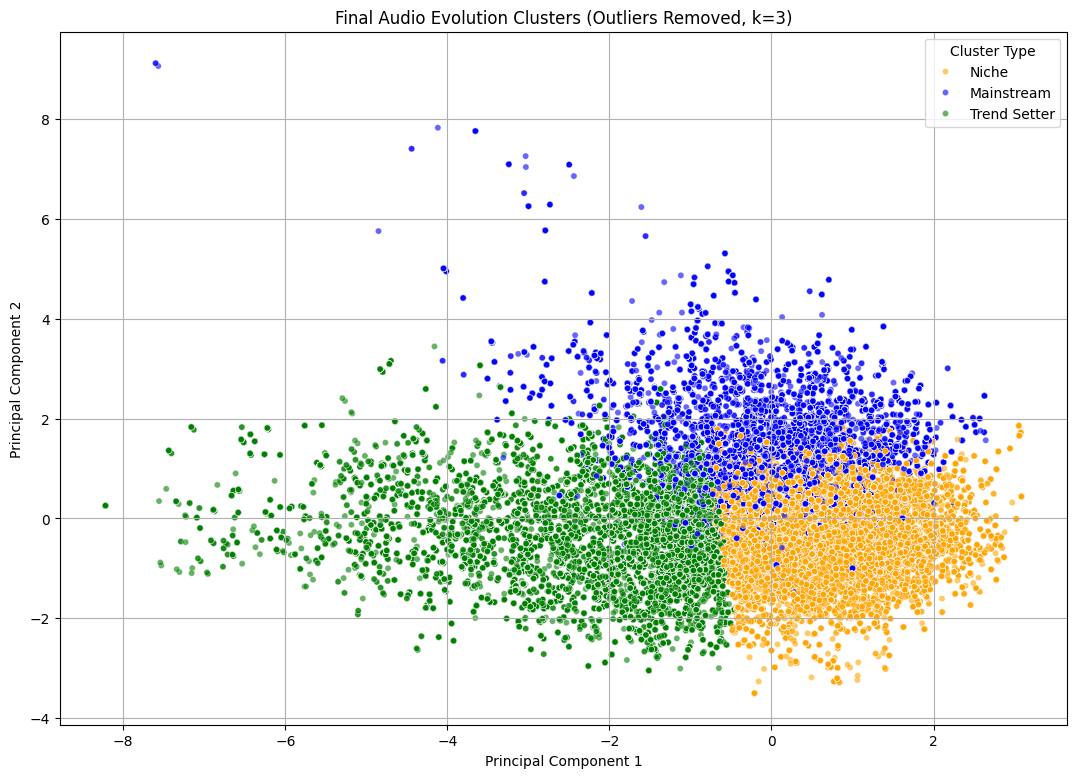

In [10]:
k_final = 3
kmeans_k3 = KMeans(n_clusters=k_final, random_state=42, n_init=10)
cluster_labels_k3 = kmeans_k3.fit_predict(X_dev_scaled_clean)
df_clean['cluster'] = cluster_labels_k3
df_dev_clean['cluster'] = cluster_labels_k3
cluster_centers_k3 = df_dev_clean.groupby('cluster').mean()
final_cluster_name_map = {
    0: "Trend Setter",
    1: "Mainstream",
    2: "Niche" 
}

color_map = {
    "Trend Setter": "green",
    "Mainstream": "blue",
    "Niche": "orange"
}
df_clean['cluster_name'] = df_clean['cluster'].map(final_cluster_name_map)
pca = PCA(n_components=2)
X_pca_clean = pca.fit_transform(X_dev_scaled_clean)

pca_df_clean = pd.DataFrame(data=X_pca_clean, columns=['PCA 1', 'PCA 2'])
pca_df_clean['Cluster Name'] = df_clean['cluster_name'].values # Add names

plt.figure(figsize=(13, 9))
sns.scatterplot(
    data=pca_df_clean,
    x='PCA 1',
    y='PCA 2',
    hue='Cluster Name',
    palette=color_map,
    alpha=0.6,
    s=20
)
plt.title('Final Audio Evolution Clusters (Outliers Removed, k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Type')
plt.grid(True)

# Save the plot
plt.savefig("Audio Evolution Clusters.png")
plt.show()

In [14]:
for name in final_cluster_name_map.values():
    
    cluster_data = df_clean[df_clean['cluster_name'] == name]
        

    # Save to CSV
    cluster_data.to_csv("AudioEvolutionClusters.csv", index=False)